Nama : Desby Permata Sulaeman<br>
NIM : 211351042<br>
Kelas : IF pagi b

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tatamehhh12","key":"a2435885426a1d92387f3999bb0f0abe"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 80.3MB/s]


In [4]:
!mkdir groceries-dataset
!unzip groceries-dataset.zip -d groceries-dataset
!ls groceries-dataset

Archive:  groceries-dataset.zip
  inflating: groceries-dataset/Groceries_dataset.csv  
Groceries_dataset.csv


# import library yang digunakan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [43]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# Data Discovery

In [11]:
df=pd.read_csv('/content/groceries-dataset/Groceries_dataset.csv')

In [12]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [14]:
df.shape

(38765, 3)

In [15]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [16]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [17]:
df['Member_number'].value_counts()

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

# EDA (minimal 5)

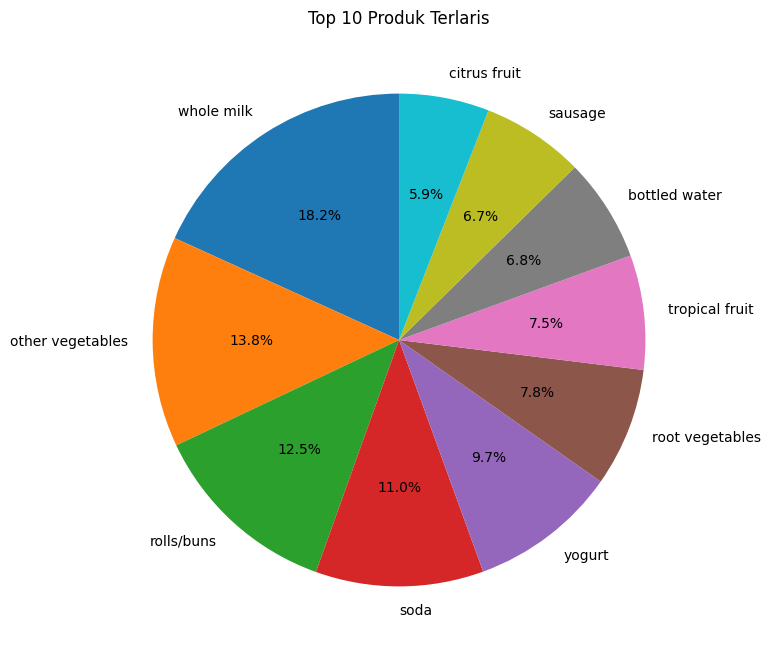

In [19]:
top_10_item = df['itemDescription'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_item, labels=top_10_item.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Produk Terlaris')
plt.show()

In [21]:
freq = (df['itemDescription'].value_counts())
freq.head()

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: itemDescription, dtype: int64

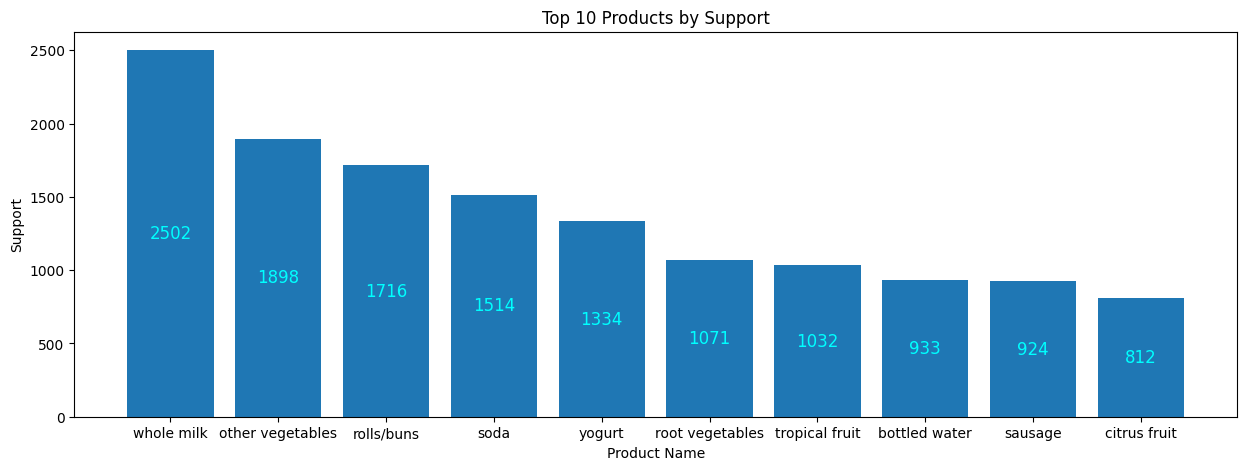

In [22]:
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(freq.head(10))), height = (freq).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', label_type = 'center')
plt.xticks(ticks = np.arange(len(freq.head(10))), labels = freq.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Support')
plt.xlabel('Product Name')
plt.show()

In [24]:
member_shopping_frequency = df.groupby('Member_number')['Date'].count().sort_values(ascending=False)
print(member_shopping_frequency)

Member_number
3180    36
3737    33
3050    33
2051    33
3915    31
        ..
3533     2
2302     2
4824     2
1084     2
3377     2
Name: Date, Length: 3898, dtype: int64


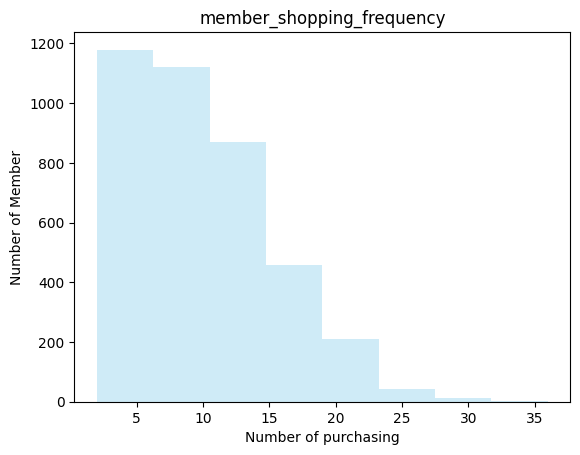

In [25]:
sns.distplot(member_shopping_frequency, bins=8, kde=False, color='skyblue')
plt.xlabel('Number of purchasing')
plt.ylabel('Number of Member')
plt.title('member_shopping_frequency')
plt.show()

# Preprocessing

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [31]:
df['Member_number'].nunique()

3898

In [32]:
df['date'] = df['Date'].dt.date

df['month'] = df['Date'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df['weekday'] = df['Date'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

df.drop('Date', axis = 1, inplace = True)
df.head()

,Member_number,itemDescription,date,month,weekday
0,1808,tropical fruit,2015-07-21,July,Tuesday
1,2552,whole milk,2015-05-01,May,Friday
2,2300,pip fruit,2015-09-19,September,Saturday
3,1187,other vegetables,2015-12-12,December,Saturday
4,3037,whole milk,2015-01-02,January,Friday


In [33]:
df['itemDescription'] = df['itemDescription'].str.strip()
df['itemDescription'] = df['itemDescription'].str.lower()
df.head()

,Member_number,itemDescription,date,month,weekday
0,1808,tropical fruit,2015-07-21,July,Tuesday
1,2552,whole milk,2015-05-01,May,Friday
2,2300,pip fruit,2015-09-19,September,Saturday
3,1187,other vegetables,2015-12-12,December,Saturday
4,3037,whole milk,2015-01-02,January,Friday


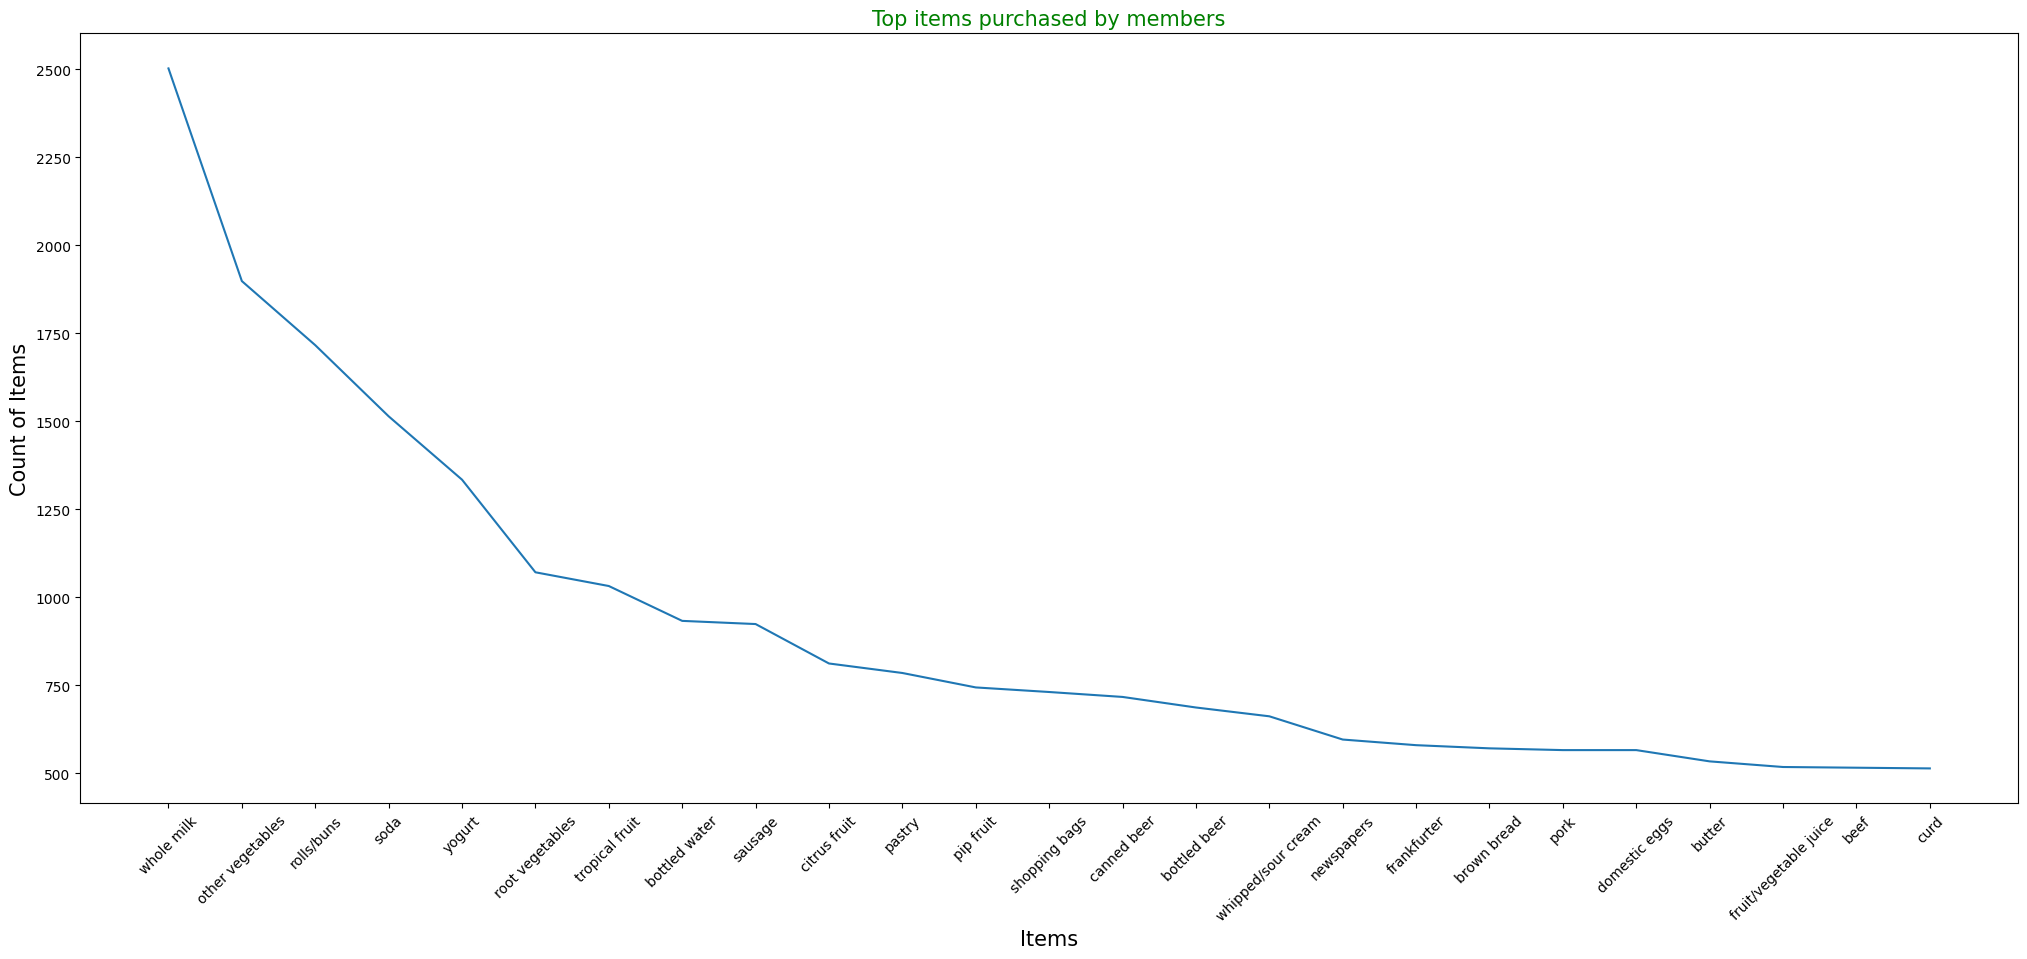

In [34]:
plt.figure(figsize=(25,10))
sns.lineplot(x = df.itemDescription.value_counts().head(25).index, y = df.itemDescription.value_counts().head(25).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top items purchased by members', color = 'green', size = 15)
plt.show()

In [35]:
months = df.groupby('month')['Member_number'].count()

Text(0.5, 1.0, 'Items bought split by month')

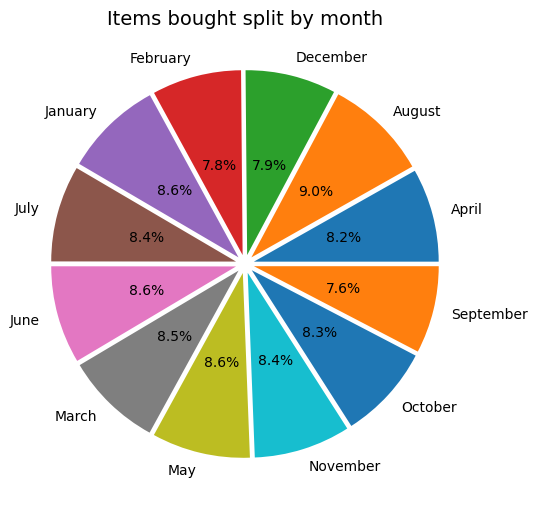

In [36]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=months, autopct="%.1f%%", explode=[0.05]*12, labels=months.keys(), pctdistance=0.5)
plt.title("Items bought split by month", fontsize=14)

In [37]:
days = df.groupby('weekday')['Member_number'].count()
print(days.keys())

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')


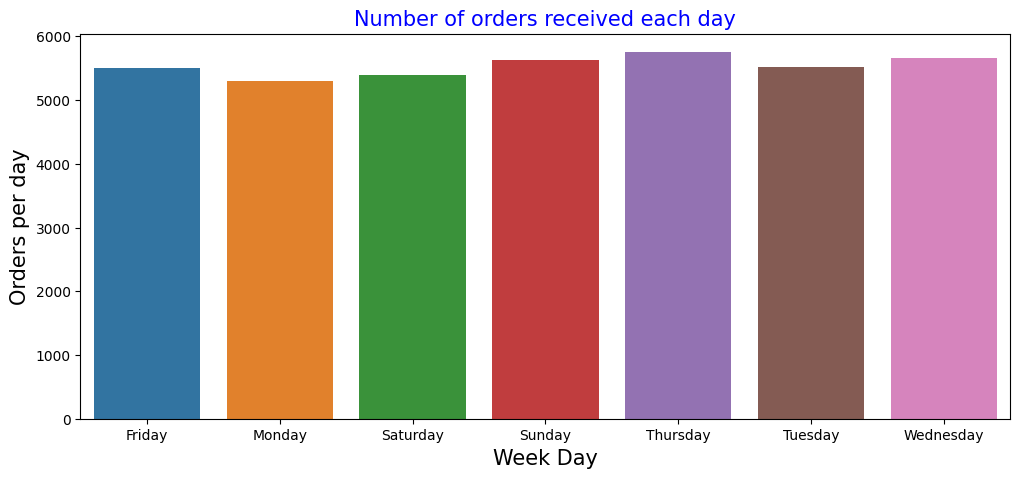

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x=days.keys(), y=days)
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'blue', size = 15)
plt.show()

In [39]:
df['itemDescription'] = df.groupby(['Member_number', 'date'])['itemDescription'].transform(lambda x: ','.join(x))

# modeling

In [40]:
df.head()

,Member_number,itemDescription,date,month,weekday
0,1808,"tropical fruit,rolls/buns,candy",2015-07-21,July,Tuesday
1,2552,"whole milk,tropical fruit,chocolate",2015-05-01,May,Friday
2,2300,"pip fruit,other vegetables,flour",2015-09-19,September,Saturday
3,1187,"other vegetables,onions,shopping bags",2015-12-12,December,Saturday
4,3037,"whole milk,other vegetables,white bread",2015-01-02,January,Friday


In [41]:
lst=[]
for i in range(0,len(df)-1):
    data = df['itemDescription'][i].split(',')
    lst.append(data)

In [44]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [45]:
frq_items = apriori(df_new, min_support=0.02,use_colnames=True)
frq_items

,support,itemsets
0,0.039624,(beef)
1,0.024739,(berries)
2,0.054742,(bottled beer)
3,0.069497,(bottled water)
4,0.044165,(brown bread)
5,0.041895,(butter)
6,0.020586,(butter milk)
7,0.055954,(canned beer)
8,0.033072,(chicken)
9,0.028093,(chocolate)


# Visualisasi hasil algoritma

In [46]:
rules = association_rules(frq_items, metric = "confidence", min_threshold = 0.1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(rolls/buns),(whole milk),0.127954,0.183753,0.022237,0.173790,0.945782,-0.001275,0.987942,-0.061682
1,(other vegetables),(whole milk),0.137679,0.183753,0.022340,0.162263,0.883052,-0.002959,0.974348,-0.133134
0,(whole milk),(other vegetables),0.183753,0.137679,0.022340,0.121578,0.883052,-0.002959,0.981670,-0.139600
3,(whole milk),(rolls/buns),0.183753,0.127954,0.022237,0.121016,0.945782,-0.001275,0.992108,-0.065622


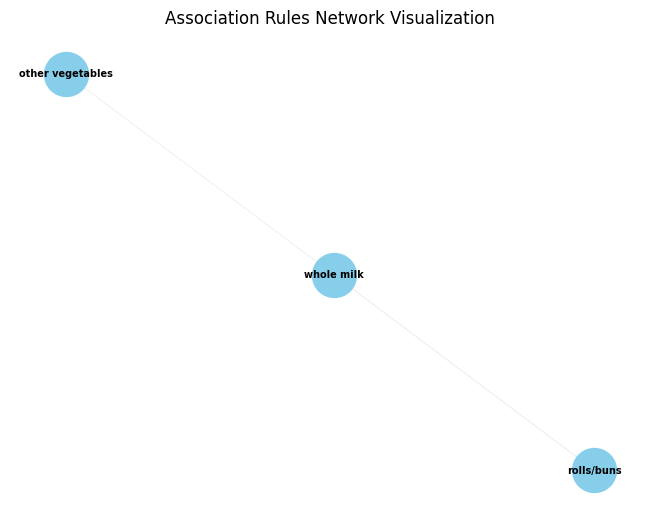

In [50]:
G = nx.Graph()

for index, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_size=7, node_size=1000, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', width=[d['weight'] * 0.1 for u, v, d in G.edges(data=True)])
plt.title('Association Rules Network Visualization')
plt.show()

# save model (pickle)

In [ ]:
code 1

In [ ]:
code 2

In [ ]:
code 3